In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# alter df settings so that every line will be printed
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [3]:
# file names
full_AA_comparison = "data/PSMDB_90_non_red_pro_70_non_red_lig_13_ha_cutoff_activesite_AA_composition_at_5_Ang_cutoff_and_13_heavy_atom_ligand.csv"
full_AA_comparison_per_lig = "data/PSMDB_90_non_red_pro_70_non_red_lig_13_ha_cutoff_activesite_AA_composition_per_ligand_at_5_Ang_cutoff_and_13_heavy_atom_ligand.csv"

contact_counts = "data/PSMDB_90_non_red_pro_70_non_red_lig_13_ha_cutoff_contact_counts_5_Ang_cutoff_and_13_heavy_atom_ligand.csv"
contact_counts_per_lig = "data/PSMDB_90_non_red_pro_70_non_red_lig_13_ha_cutoff_contact_counts_per_lig_res_5_Ang_cutoff_and_13_heavy_atom_ligand.csv"

In [4]:
AA_comp_full = pd.read_csv( full_AA_comparison )
AA_comp_full

,PDB,num_lig_res,num_lig_atoms,num_lig_nonpolar_atoms,num_lig_polar_atoms,num_lig_unk_atom_type,num_activesite_res,num_activesite_atoms,num_activesite_nonpolar_atoms,num_activesite_polar_atoms,num_activesite_unk_atom_type,ALA,CYS,ASP,GLU,PHE,GLY,HIS,ILE,LYS,LEU,MET,ASN,PRO,GLN,ARG,SER,THR,VAL,TRP,TYR
0,154l,3,43,24,19,0,18,96,64,32,0,3,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,0,2
1,16pk,2,54,23,31,0,36,109,64,45,0,5,0,3,1,2,12,1,0,2,1,2,1,2,0,0,0,1,2,0,1
2,18gs,2,64,32,32,0,34,157,99,58,0,0,0,2,0,2,2,0,2,2,2,0,2,2,4,2,4,2,0,2,4
3,19gs,4,96,52,44,0,41,217,144,73,0,0,0,2,1,2,4,0,2,2,2,0,2,4,6,2,2,0,4,2,4
4,1a01,4,172,136,36,0,87,335,274,61,0,4,0,0,0,17,0,10,0,4,26,2,4,0,0,0,2,4,12,0,2
5,1a4i,2,96,42,54,0,52,204,126,78,0,2,4,2,0,0,10,2,4,2,2,2,2,0,2,2,4,6,6,0,0
6,1a4m,4,76,40,36,0,87,294,208,86,0,4,4,12,4,8,4,16,0,0,12,7,0,0,0,4,8,0,0,0,4
7,1a4q,2,56,40,16,0,44,164,89,75,0,2,0,2,8,0,4,0,2,0,0,0,4,0,0,12,4,0,0,4,2
8,1a4w,1,42,29,13,0,21,86,58,28,0,1,2,1,3,0,3,1,1,1,1,0,1,0,0,0,2,0,1,2,1
9,1a6v,3,88,56,32,0,40,199,148,51,0,0,0,0,0,0,3,3,0,3,0,0,1,0,0,3,4,1,0,12,10


In [5]:
index = 0
row_nums = []

for num in AA_comp_full["num_lig_unk_atom_type"]:
    if num != 0:
        row_nums.append( index )
    index += 1
    
print row_nums
AA_comp_full.iloc[[2487]]

[2487]


,PDB,num_lig_res,num_lig_atoms,num_lig_nonpolar_atoms,num_lig_polar_atoms,num_lig_unk_atom_type,num_activesite_res,num_activesite_atoms,num_activesite_nonpolar_atoms,num_activesite_polar_atoms,num_activesite_unk_atom_type,ALA,CYS,ASP,GLU,PHE,GLY,HIS,ILE,LYS,LEU,MET,ASN,PRO,GLN,ARG,SER,THR,VAL,TRP,TYR
2487,2r24,2,82,37,35,10,49,503,183,75,245,2,3,2,1,3,2,1,2,3,4,0,2,4,1,1,4,4,3,4,3


In [6]:
AA_comp_per_lig = pd.read_csv( full_AA_comparison_per_lig )
AA_comp_per_lig

,PDB,uniq_lig_res_names,lig_res_names,num_lig_atoms,num_lig_nonpolar_atoms,num_lig_polar_atoms,num_lig_unk_atoms,num_activesite_res,num_activesite_atoms,num_activesite_nonpolar_atoms,num_activesite_polar_atoms,ALA,CYS,ASP,GLU,PHE,GLY,HIS,ILE,LYS,LEU,MET,ASN,PRO,GLN,ARG,SER,THR,VAL,TRP,TYR
0,154l,NAG_A_187,NAG,14,8,6,0,13,48,33,15,2,0,1,0,1,1,1,1,0,0,1,1,0,1,0,1,0,1,0,1
1,154l,NAG_A_186,NAG,14,8,6,0,1,21,15,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,154l,NAG_A_188,NAG,15,8,7,0,4,27,16,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,16pk,BIS_A_499,BIS,39,15,24,0,32,90,51,39,4,0,3,1,2,12,1,0,2,1,1,1,1,0,0,0,1,1,0,1
4,16pk,EPE_A_430,EPE,15,8,7,0,4,19,13,6,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
5,18gs,GDN_A_210,GDN,32,16,16,0,17,78,50,28,0,0,1,0,1,1,0,1,1,1,0,1,1,2,1,2,1,0,1,2
6,18gs,GDN_B_210,GDN,32,16,16,0,17,79,49,30,0,0,1,0,1,1,0,1,1,1,0,1,1,2,1,2,1,0,1,2
7,19gs,GSH_B_211,GSH,20,10,10,0,13,62,38,24,0,0,1,0,1,1,0,0,1,1,0,1,1,2,1,1,0,0,1,1
8,19gs,GSH_A_211,GSH,20,10,10,0,9,63,38,25,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0,1,0,0,0,0
9,19gs,BSP_A_210,BSP,28,16,12,0,12,46,34,12,0,0,0,0,1,1,0,1,0,0,0,0,1,2,1,0,0,2,1,2


In [7]:
index = 0
row_nums = []

for num in AA_comp_per_lig["num_lig_unk_atoms"]:
    if num != 0:
        row_nums.append( index )
    index += 1
    
print row_nums

[5251]


In [8]:
#for row in AA_comp_per_lig.iterrows():
#    index, data = row
#    print data, row

In [9]:
CC_tot = pd.read_csv( contact_counts )
CC_tot

,pdb_names,num_lig_atoms,num_activesite_atms,num_polar_polar_contacts,num_polar_nonpolar_contacts,num_nonpolar_polar_contacts,num_nonpolar_nonpolar_contacts,num_unk_contacts
0,154l,43,96,46,77,65,79,0
1,16pk,54,109,92,155,49,90,0
2,18gs,64,157,111,213,101,196,0
3,19gs,96,217,140,274,106,232,0
4,1a01,172,335,65,145,223,961,0
5,1a4i,96,204,194,300,134,247,0
6,1a4m,76,294,204,380,206,383,0
7,1a4q,56,164,85,68,207,234,0
8,1a4w,42,86,53,68,67,143,0
9,1a6v,88,199,100,329,118,399,0


In [10]:
CC_per_lig_tot = pd.read_csv( contact_counts_per_lig )
CC_per_lig_tot

,pdb_names,lig_names,num_lig_atms,num_activesite_atms,polar_polar_contacts,polar_nonpolar_contacts,nonpolar_polar_contacts,nonpolar_nonpolar_contacts,num_unk_contacts
0,154l,NAG_A_187,14,48,18,38,34,50,0
1,154l,NAG_A_186,14,21,6,17,4,17,0
2,154l,NAG_A_188,15,27,22,22,27,12,0
3,16pk,BIS_A_499,39,90,80,120,49,88,0
4,16pk,EPE_A_430,15,19,12,35,0,2,0
5,18gs,GDN_A_210,32,78,54,104,51,96,0
6,18gs,GDN_B_210,32,79,57,109,50,100,0
7,19gs,GSH_B_211,20,62,49,83,42,71,0
8,19gs,BSP_A_210,28,46,20,56,11,45,0
9,19gs,GSH_A_211,20,63,50,79,42,71,0


In [16]:
# get a list of all unique ligand names
unique_ligand_residue_codes = []
for lig_name in AA_comp_per_lig["uniq_lig_res_names"]:
    uniq_res = lig_name.split( '_' )[0]
    if uniq_res not in unique_ligand_residue_codes:
        unique_ligand_residue_codes.append( uniq_res )
        
print "There are", len( unique_ligand_residue_codes ), "unique ligand residue names"
    

There are 2845 unique ligand residue names


In [47]:
index = 0
for num in CC_per_lig_tot.num_lig_atms:
    if num > 400:
        print num, index
    index += 1

smaller_CC_per_lig_tot = CC_per_lig_tot.drop( CC_per_lig_tot.index[ [5005, 5013 ] ] )

512 5005
848 5013
132


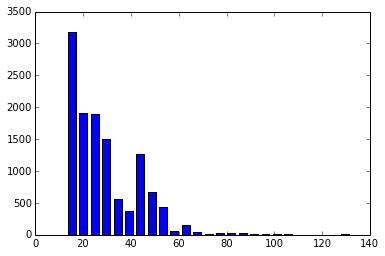

In [49]:
num_lig_atoms = smaller_CC_per_lig_tot[ "num_lig_atms" ]

hist, bins = np.histogram(num_lig_atoms, bins=25)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()